In [1]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=0c88e980795f2c6922f2b13f93f92a89d1f922fb67085513218e48d97451ec02
  Stored in directory: c:\users\jh\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config lnlineBackend.figure_format = 'retina'


In [4]:
pass_time = [8, 9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5, 20, 20, 20]
fail_time = [1, 2, 2.1, 2.6, 2.7, 2.8, 2.9, 3, 3.2, 3.4, 3.5, 3.6, 3, 5, 5.2, 5.4]

In [5]:
X=np.hstack((pass_time,fail_time))
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [8]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

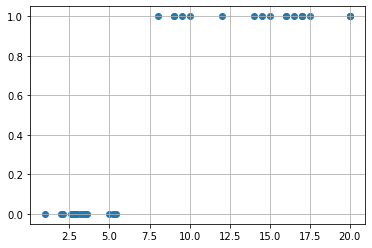

In [9]:
plt.scatter(X,y)
plt.grid()
plt.show()

In [10]:
model = LogisticRegression()
model.fit(X.reshape(-1,1),y)
model.coef_, model.intercept_

(array([[1.32952239]]), array([-9.1854821]))

In [11]:
model.predict([[7.0],[6.5]])


array([1, 0])

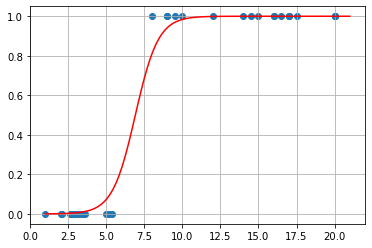

In [12]:
def logreg(z):
    return 1/(1+np.exp(-z))

xx=np.linspace(1,21,100)
yy=logreg(model.coef_*xx + model.intercept_)[0]
plt.plot(xx,yy,c='r')
plt.scatter(X,y)
plt.grid()

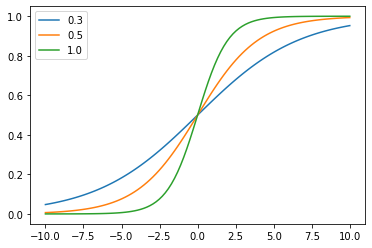

In [16]:
w_list = [0.3,0.5,1.0]
b_list = [0]
xx = np.linspace(-10,10,100)
for w in w_list:
    for b in b_list:
        yy=logreg(w*xx+b)
        plt.plot(xx,yy,label=f'{w}')
        
plt.legend()

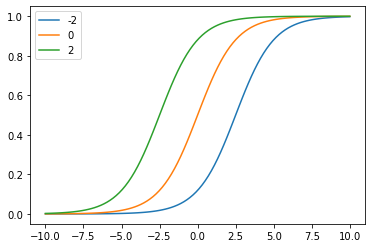

In [17]:
w_list = [0.8]            # 가중치(기울기)
b_list = [-2, 0, 2]       # 편향(절편)
xx = np.linspace(-10, 10, 100)
for w in w_list:
  for b in b_list:
    yy = logreg(w * xx + b)
    plt.plot(xx, yy, label=f'{b}')

plt.legend()

In [18]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [19]:
X,y=make_forge()

C:\Users\JH\anaconda3\envs\GJ_AI\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


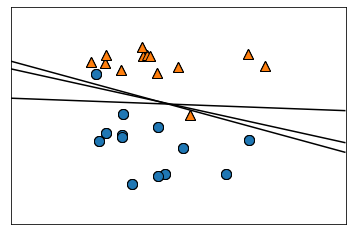

In [28]:
c_list = [2,1,0.01]
color = ['red','green','blue']
for i in range(3) :
    model = LogisticRegression(C=c_list[i])
    model.fit(X,y)

    mglearn.plots.plot_2d_separator(model,X)
    mglearn.discrete_scatter(X[:,0],X[:,1],y)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X=cancer.data
y=cancer.target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
X_train.shape

(426, 30)

In [30]:
model = LogisticRegression(C=1,max_iter=10000).fit(X_train,y_train)
model.score(X_train,y_train), model.score(X_test,y_test)

(0.960093896713615, 0.965034965034965)

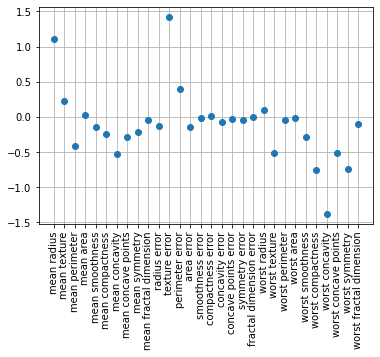

In [39]:
#각모델의 가중치표시

plt.plot(model.coef_.T,'o')
plt.xticks(range(30),cancer.feature_names,rotation=90)
plt.grid()
plt.show()

0.9765258215962441 0.965034965034965
0.960093896713615 0.965034965034965
0.9460093896713615 0.972027972027972


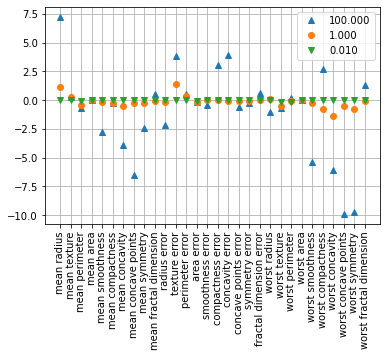

In [43]:
for C,marker in zip([100,1,0.01],['^','o','v']):
    model = LogisticRegression(C=C, max_iter=10000).fit(X_train,y_train)
    print(model.score(X_train,y_train), model.score(X_test,y_test))
    plt.plot(model.coef_.T,marker,label=f'{C:.3f}')

plt.xticks(range(30),cancer.feature_names,rotation=90)
plt.grid()
plt.legend()
plt.show()

In [49]:
model_l1=LogisticRegression(C=1,penalty='l1',solver='liblinear',max_iter=100000)
model_l1.fit(X_train,y_train)

print("사용한 특성 수 :",np.sum(model_l1.coef_ !=0))
model_l1.score(X_train,y_train), model_l1.score(X_test,y_test)

사용한 특성 수 : 10


(0.960093896713615, 0.958041958041958)

In [54]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

wine = load_wine()
wine.keys()
wine.data.shape
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [53]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['grade']=wine.target
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,grade
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [57]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
X_train.shape

(133, 13)

In [58]:
model = LogisticRegression(C=0.1, max_iter=10000).fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(0.9774436090225563, 0.9555555555555556)

In [59]:
y_pred = model.predict(X_test)
print(y_test.values)
print(y_pred)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]
[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 1 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


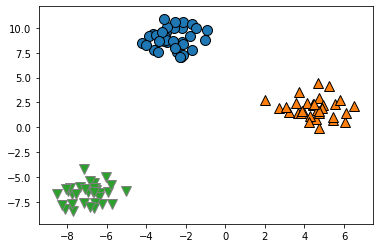

In [60]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [61]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
model = LogisticRegression(C=1, max_iter=10000).fit(X_train,y_train)

model.score(X_train,y_train),model.score(X_test,y_test)

(1.0, 1.0)

In [62]:
y_pred = model.predict(X_test)
print(y_test)
print(y_pred)

[2 2 1 1 0 1 2 0 0 2 2 2 0 2 1 2 1 2 2 1 2 0 1 1 1]
[2 2 1 1 0 1 2 0 0 2 2 2 0 2 1 2 1 2 2 1 2 0 1 1 1]


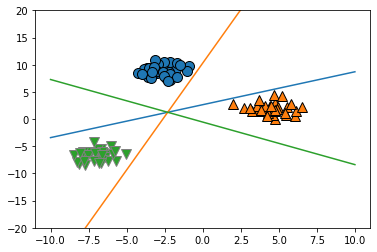

In [68]:
xx = np.linspace(-10,10,50)
for coef, intercept in zip(model.coef_,model.intercept_):
    yy = -(coef[0]*xx+intercept)/coef[1]
    plt.plot(xx,yy)

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.ylim(-20,20)
plt.show()

In [64]:
model.coef_[0]

array([-0.37202592,  0.61430193])

In [74]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris_dataset = load_iris()

In [84]:
from sklearn.model_selection import train_test_split
X = iris_dataset.data[:, 2:]
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(112, 2)

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
model = LogisticRegression(C=1, max_iter=10000).fit(X_train,y_train)

model.score(X_train,y_train),model.score(X_test,y_test)

(0.9732142857142857, 0.9736842105263158)

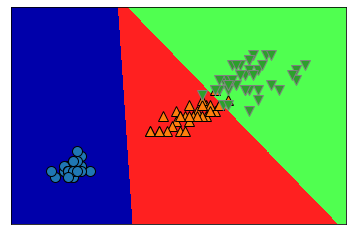

In [86]:
mglearn.plots.plot_2d_classification(model,X_train)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [89]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC().fit(X_train,y_train)


In [90]:
model_svc.score(X_train,y_train),model_svc.score(X_test,y_test)

(0.9107142857142857, 0.8157894736842105)

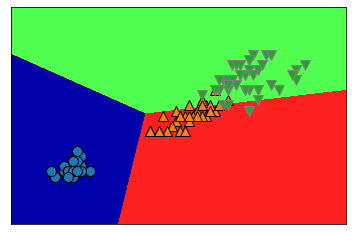

In [91]:
mglearn.plots.plot_2d_classification(model_svc,X_train)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.show()